In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Configure plots
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (12, 6)

In [98]:
df = pd.read_csv("../data/processed/master_file_1995_onward.csv")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        5422 non-null   object 
 1   EPU_CAN     5412 non-null   float64
 2   IP_CAN      5097 non-null   float64
 3   INF_CAN     439 non-null    float64
 4   EX_CAN      1768 non-null   float64
 5   IM_CAN      1768 non-null   float64
 6   RECESS_CAN  4737 non-null   float64
 7   GDP_CAN     1789 non-null   float64
 8   GDPC_CAN    159 non-null    float64
 9   EXR_CAN     5422 non-null   float64
 10  CCI_CAN     3527 non-null   float64
 11  UNEMP_CAN   439 non-null    float64
 12  EPU_GER     5412 non-null   float64
 13  IP_GER      417 non-null    float64
 14  INF_GER     439 non-null    float64
 15  UNEMP_GER   834 non-null    float64
 16  IM_GER      1789 non-null   float64
 17  EX_GER      1701 non-null   float64
 18  RECESS_GER  4737 non-null   float64
 19  GDP_GER     1789 non-null  

In [100]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df.set_index("date", inplace=True)

In [101]:
df.head()

,EPU_CAN,IP_CAN,INF_CAN,EX_CAN,IM_CAN,RECESS_CAN,GDP_CAN,GDPC_CAN,EXR_CAN,CCI_CAN,...,GDP_CHI,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,YS_CAN,YS_MEX,YS_JAP,YS_CHI,YS_GER
date,,,,,,,,,,,,,,,,,,,,,
1995-01-01,194.27143,78.67034,2.14876,94289.3,75290.0,1.0,314818.8,31562.0,1.413225,98.954867,...,1831.415106,101.4460,99.78362,100.8655,NaN,NaN,NaN,1.920,NaN,NaN
1995-02-01,126.45159,78.68018,NaN,NaN,NaN,1.0,NaN,NaN,1.400489,98.723338,...,NaN,101.9429,99.71936,100.6017,NaN,NaN,NaN,2.025,NaN,NaN
1995-03-01,162.71977,78.11946,NaN,NaN,NaN,1.0,NaN,NaN,1.407696,98.432064,...,NaN,102.3471,99.82658,100.3427,NaN,NaN,NaN,2.281,NaN,NaN
1995-04-01,128.56147,77.95197,NaN,92252.0,75893.0,1.0,314952.5,NaN,1.376200,98.057907,...,NaN,102.6162,99.94355,100.1427,NaN,NaN,NaN,1.934,NaN,NaN
1995-05-01,96.17798,77.87333,NaN,NaN,NaN,1.0,NaN,NaN,1.360873,97.935379,...,NaN,102.7064,100.01840,100.0530,NaN,NaN,NaN,2.431,NaN,NaN


In [102]:
def safe_plot(df_subset, title, ylabel):
    # Drop columns that are all NaN
    df_clean = df_subset.dropna(axis=1, how="all")
    if df_clean.empty:
        print(f"No data available for: {title}")
        return
    df_clean.plot(title=title)
    plt.ylabel(ylabel)
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

In [103]:
gdp_cols = [col for col in df.columns if col.startswith("GDP_") and not col.startswith("GDPC")]
epu_cols = [col for col in df.columns if col.startswith("EPU_")]
recess_cols = [col for col in df.columns if col.startswith("RECESS_")]
inflation_cols = [col for col in df.columns if col.startswith("INF_")]
cci_cols = [col for col in df.columns if col.startswith("CCI_")]
export_cols = [col for col in df.columns if col.startswith("EX_") and not col.startswith("EXR")]
import_cols = [col for col in df.columns if col.startswith("IM_")]
unemp_cols = [col for col in df.columns if "UNEMP_" in col]
ys_cols = [col for col in df.columns if col.startswith("YS_")]


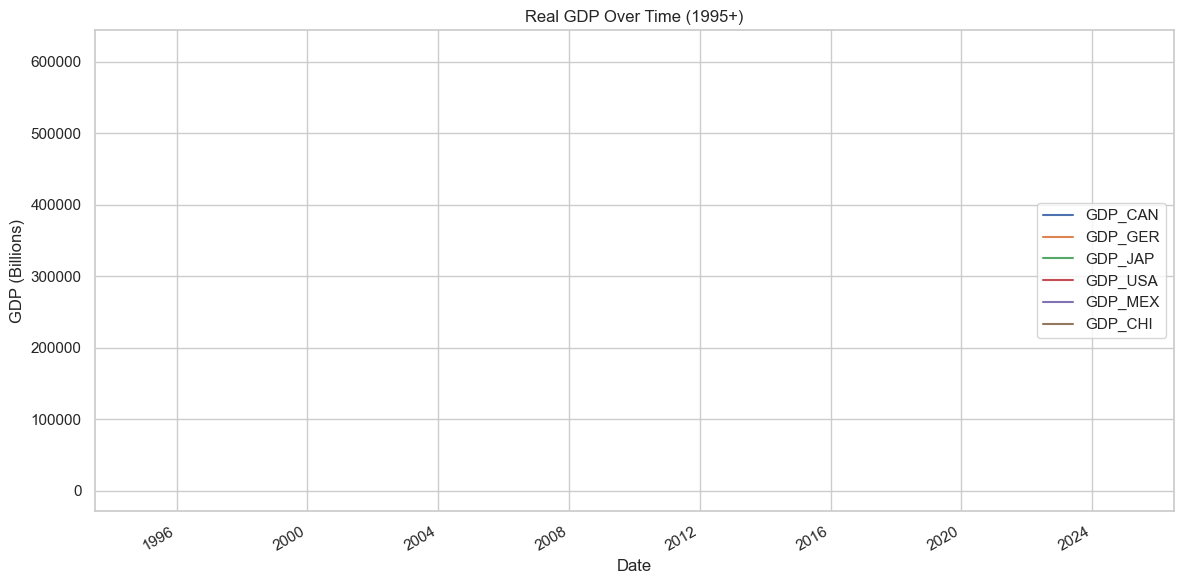

In [104]:
# GDP Over Time
safe_plot(df[gdp_cols], "Real GDP Over Time (1995+)", "GDP (Billions)")

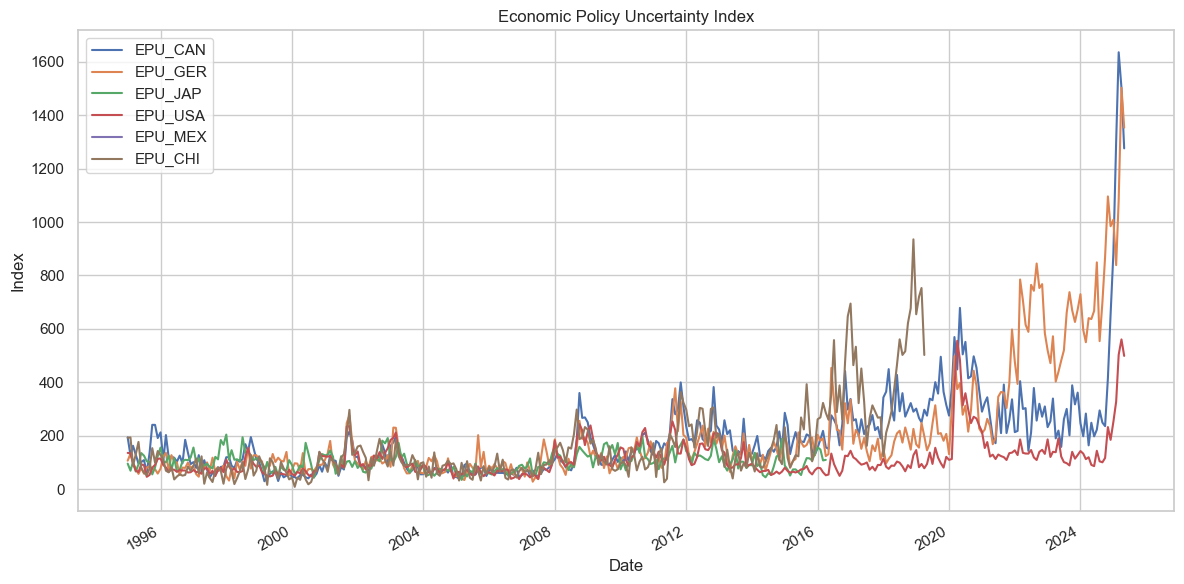

In [105]:
safe_plot(df[epu_cols], "Economic Policy Uncertainty Index", "Index")

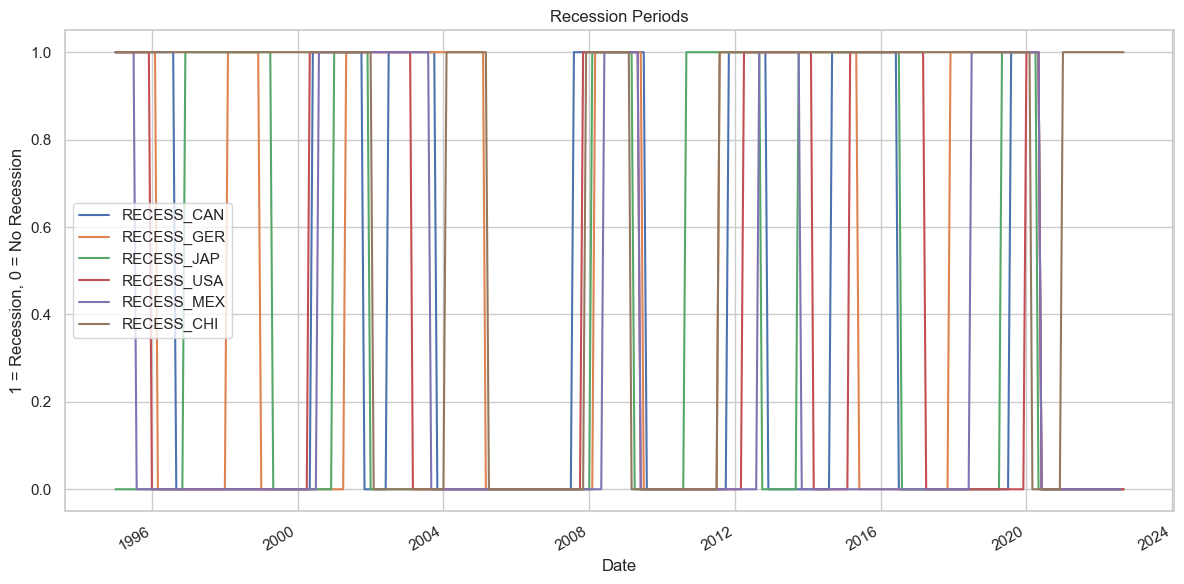

In [106]:
safe_plot(df[recess_cols], "Recession Periods", "1 = Recession, 0 = No Recession")

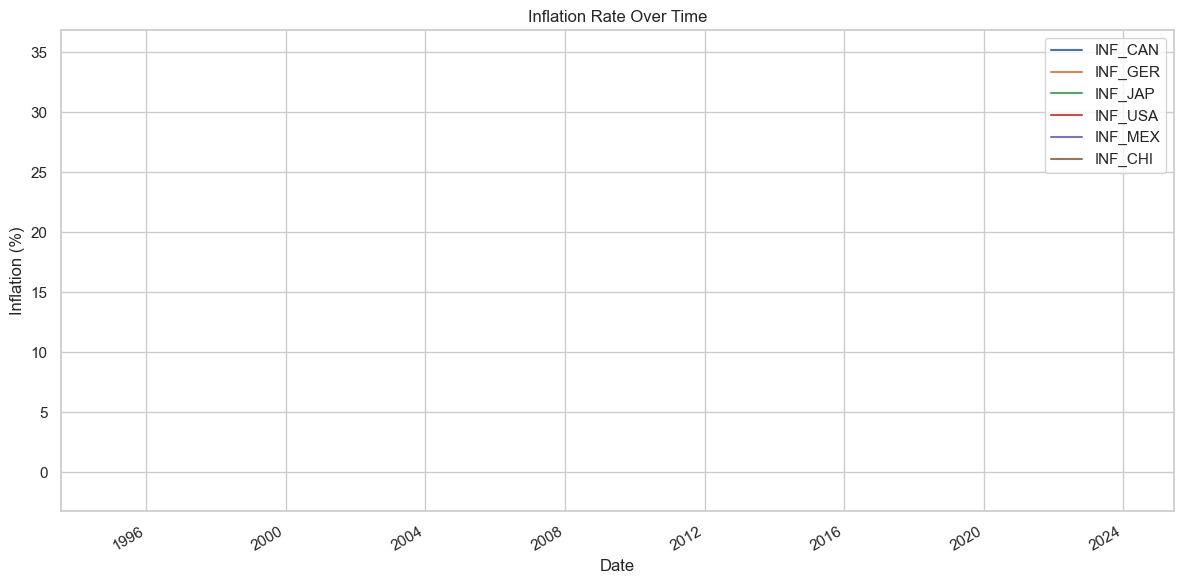

In [107]:
safe_plot(df[inflation_cols], "Inflation Rate Over Time", "Inflation (%)")

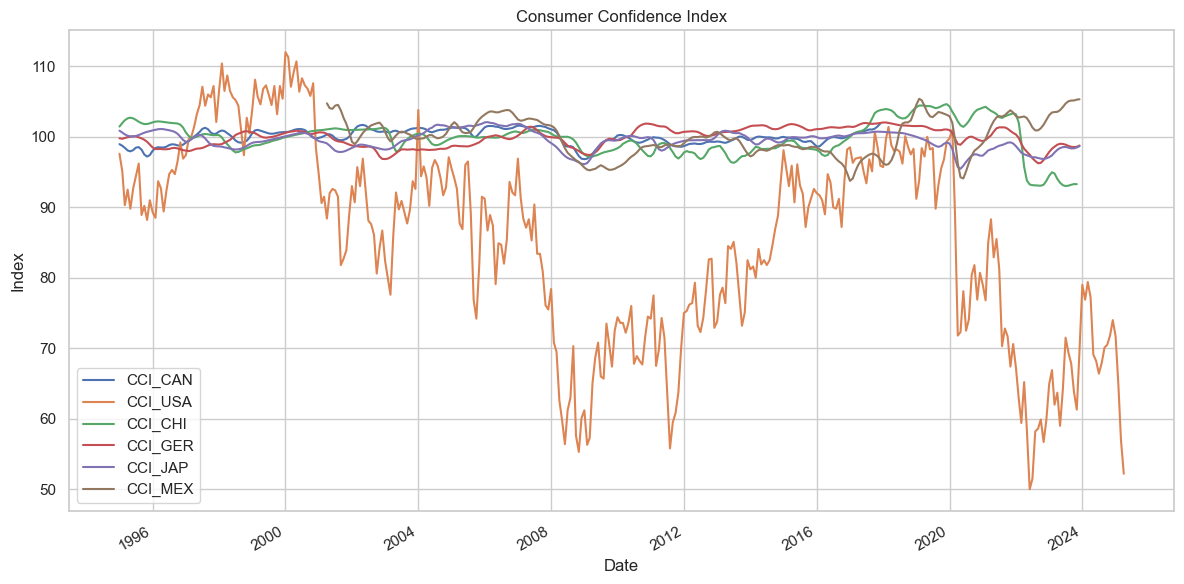

In [108]:
safe_plot(df[cci_cols], "Consumer Confidence Index", "Index")

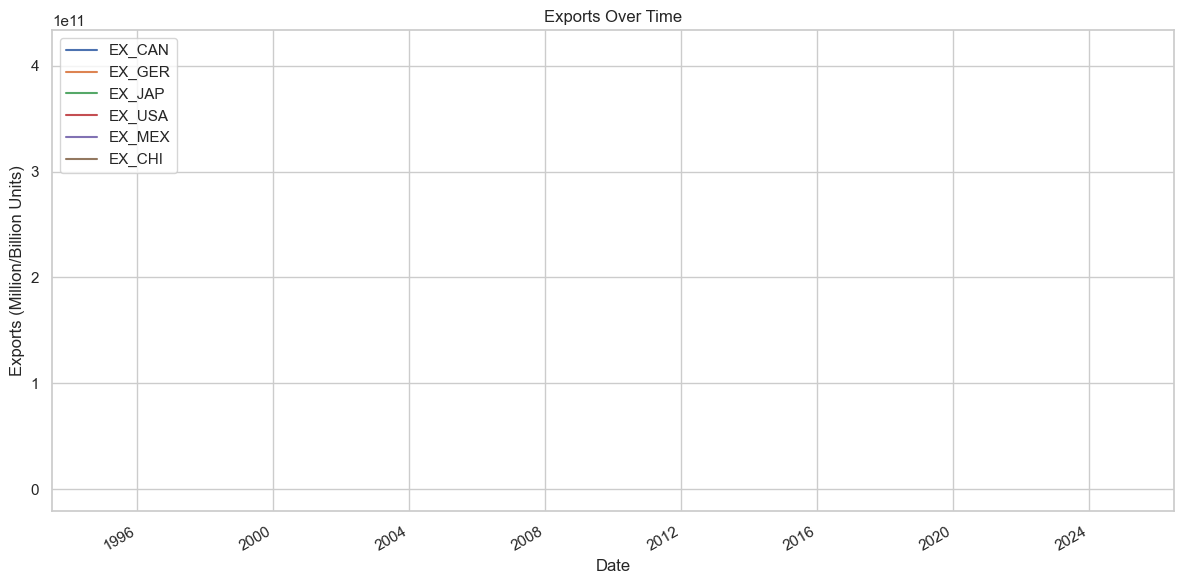

In [109]:
safe_plot(df[export_cols], "Exports Over Time", "Exports (Million/Billion Units)")

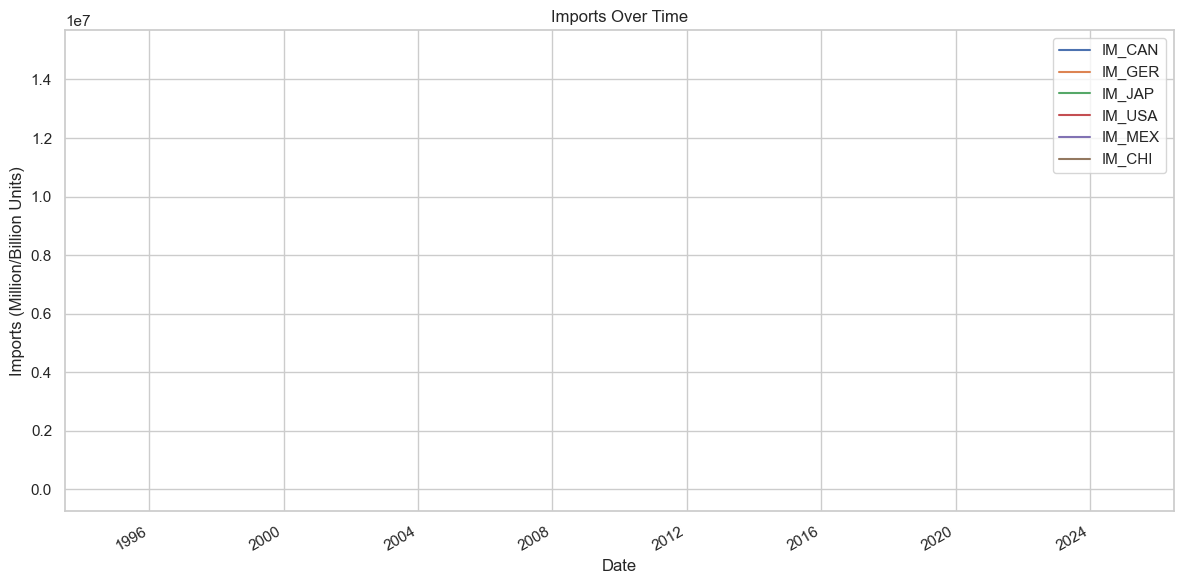

In [110]:
safe_plot(df[import_cols], "Imports Over Time", "Imports (Million/Billion Units)")

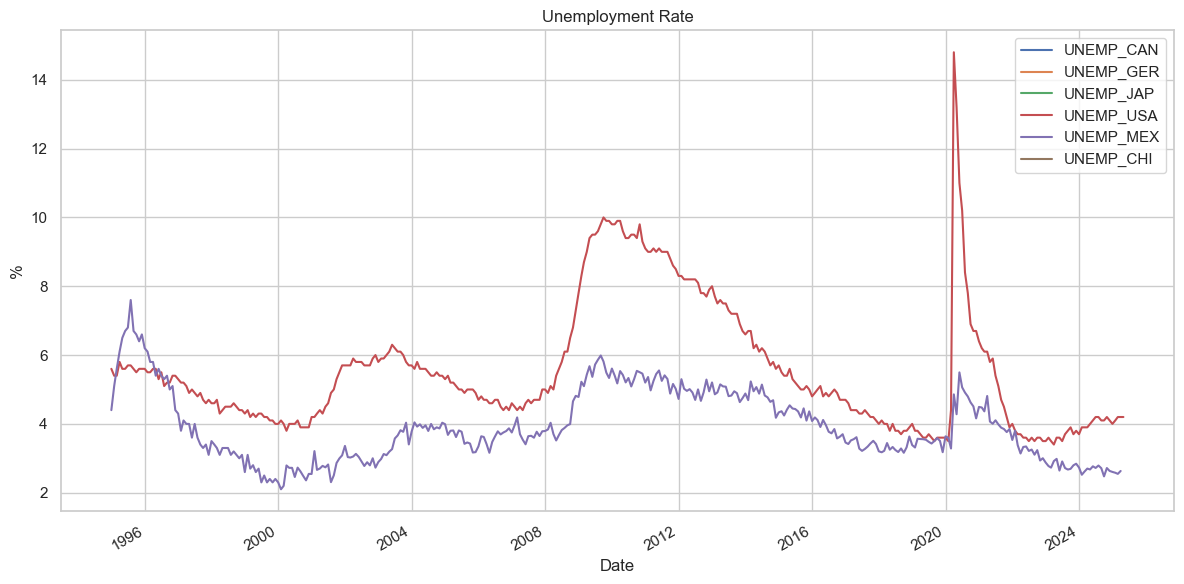

In [111]:
safe_plot(df[unemp_cols], "Unemployment Rate", "%")

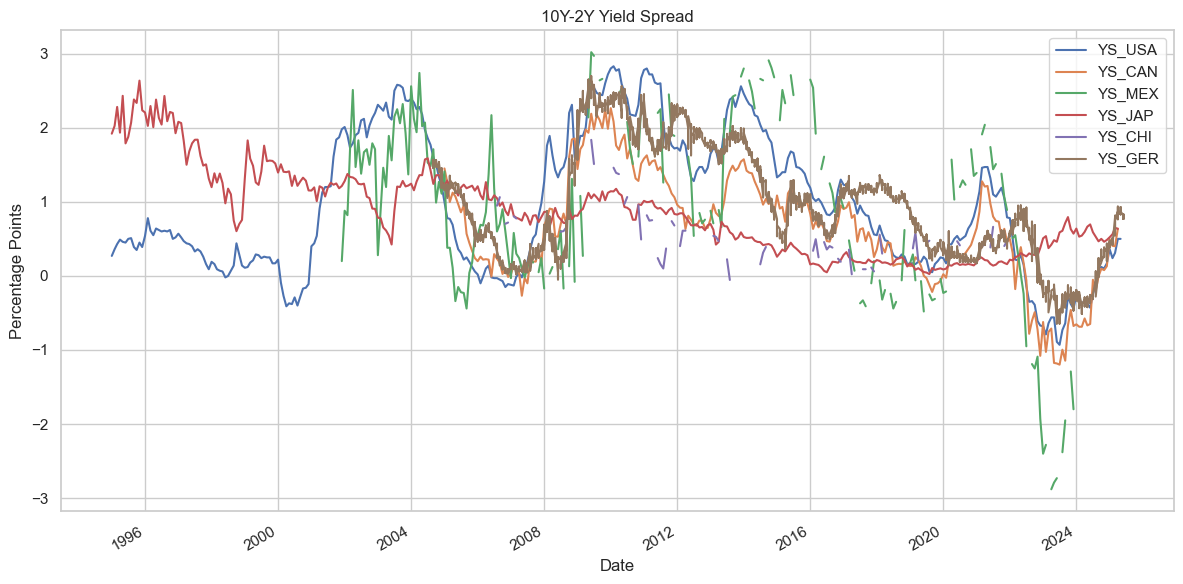

In [112]:
safe_plot(df[ys_cols], "10Y-2Y Yield Spread", "Percentage Points")

In [113]:
subset_all = df[gdp_cols + epu_cols].dropna()

if not subset_all.empty:
    corr_all = subset_all.corr()
    print("Raw Correlation Matrix:")
    display(corr_all)
else:
    print("Not enough data to compute full correlation matrix.")

Raw Correlation Matrix:


,GDP_CAN,GDP_GER,GDP_JAP,GDP_USA,GDP_MEX,GDP_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
GDP_CAN,1.000000,0.945143,0.813917,0.990453,0.980289,0.940745,0.476571,0.611376,0.210290,0.004916,-0.017705,0.530341
GDP_GER,0.945143,1.000000,0.820747,0.939287,0.971218,0.911337,0.406042,0.643842,0.400481,-0.031936,-0.012320,0.542775
GDP_JAP,0.813917,0.820747,1.000000,0.854232,0.877740,0.675504,0.067146,0.299442,0.043247,-0.395162,-0.100967,0.178645
GDP_USA,0.990453,0.939287,0.854232,1.000000,0.979838,0.914334,0.431781,0.603622,0.221189,-0.056708,-0.043079,0.514178
GDP_MEX,0.980289,0.971218,0.877740,0.979838,1.000000,0.921574,0.420319,0.605406,0.255382,-0.073943,0.004300,0.513053
GDP_CHI,0.940745,0.911337,0.675504,0.914334,0.921574,1.000000,0.616355,0.683325,0.305882,0.100495,0.026087,0.642352
EPU_CAN,0.476571,0.406042,0.067146,0.431781,0.420319,0.616355,1.000000,0.810459,0.378996,0.518255,0.226394,0.838516
EPU_GER,0.611376,0.643842,0.299442,0.603622,0.605406,0.683325,0.810459,1.000000,0.696465,0.553813,0.144725,0.884411
EPU_JAP,0.210290,0.400481,0.043247,0.221189,0.255382,0.305882,0.378996,0.696465,1.000000,0.439268,0.048661,0.632089
EPU_USA,0.004916,-0.031936,-0.395162,-0.056708,-0.073943,0.100495,0.518255,0.553813,0.439268,1.000000,0.001490,0.423279


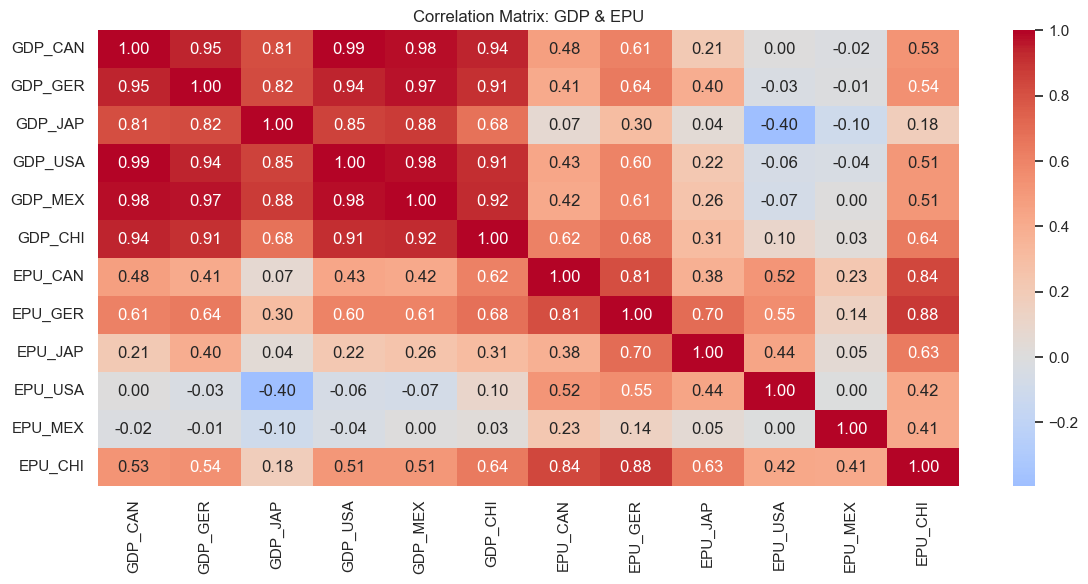

In [114]:
if 'corr_all' in locals():
    sns.heatmap(corr_all, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Matrix: GDP & EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [115]:
subset_infl = df[inflation_cols + epu_cols].dropna()

if not subset_infl.empty:
    corr_infl = subset_infl.corr()
    print("Inflation vs. EPU – Correlation Matrix:")
    display(corr_infl)
else:
    print("Not enough data for Inflation vs. EPU correlation.")

Inflation vs. EPU – Correlation Matrix:


,INF_CAN,INF_GER,INF_JAP,INF_USA,INF_MEX,INF_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
INF_CAN,1.000000,0.684586,0.247525,0.866973,-0.014693,0.656748,-0.742561,-0.505429,-0.200351,-0.394956,-0.129869,-0.543665
INF_GER,0.684586,1.000000,0.137543,0.848356,0.064099,0.737946,-0.489438,-0.210719,0.089291,0.026222,0.058553,-0.289587
INF_JAP,0.247525,0.137543,1.000000,0.180224,-0.022122,0.196741,-0.080283,0.012558,0.057286,-0.229334,-0.434925,-0.197763
INF_USA,0.866973,0.848356,0.180224,1.000000,0.082672,0.632665,-0.791768,-0.491178,-0.125194,-0.276543,-0.079436,-0.550811
INF_MEX,-0.014693,0.064099,-0.022122,0.082672,1.000000,0.290717,-0.006651,-0.149720,0.176451,0.100884,0.023524,-0.100188
INF_CHI,0.656748,0.737946,0.196741,0.632665,0.290717,1.000000,-0.339407,-0.057766,0.166004,0.016684,-0.066140,-0.185725
EPU_CAN,-0.742561,-0.489438,-0.080283,-0.791768,-0.006651,-0.339407,1.000000,0.810459,0.378996,0.518255,0.226394,0.838516
EPU_GER,-0.505429,-0.210719,0.012558,-0.491178,-0.149720,-0.057766,0.810459,1.000000,0.696465,0.553813,0.144725,0.884411
EPU_JAP,-0.200351,0.089291,0.057286,-0.125194,0.176451,0.166004,0.378996,0.696465,1.000000,0.439268,0.048661,0.632089
EPU_USA,-0.394956,0.026222,-0.229334,-0.276543,0.100884,0.016684,0.518255,0.553813,0.439268,1.000000,0.001490,0.423279


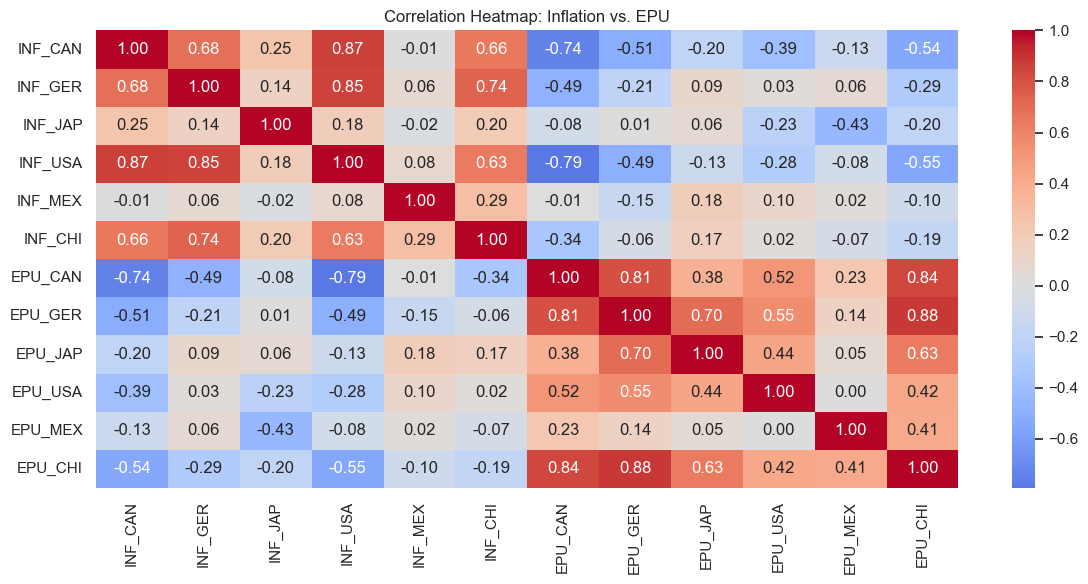

In [116]:
if 'corr_infl' in locals():
    sns.heatmap(corr_infl, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Inflation vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [117]:
subset_unemp = df[unemp_cols + epu_cols].dropna()

if not subset_unemp.empty:
    corr_unemp = subset_unemp.corr()
    print("Unemployment vs. EPU – Correlation Matrix:")
    display(corr_unemp)
else:
    print("Not enough data for Unemployment vs. EPU correlation.")

Unemployment vs. EPU – Correlation Matrix:


,UNEMP_CAN,UNEMP_GER,UNEMP_JAP,UNEMP_USA,UNEMP_MEX,UNEMP_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
UNEMP_CAN,1.000000,-0.395434,0.819122,0.861260,0.789947,0.634108,0.641991,0.326715,0.066650,0.599972,0.146687,0.468190
UNEMP_GER,-0.395434,1.000000,0.106386,-0.644824,-0.736509,-0.583097,-0.706087,-0.678239,-0.521480,-0.575320,-0.102312,-0.638153
UNEMP_JAP,0.819122,0.106386,1.000000,0.623316,0.447792,0.306589,0.314285,0.111154,-0.042752,0.434926,0.131411,0.263929
UNEMP_USA,0.861260,-0.644824,0.623316,1.000000,0.942113,0.490641,0.620960,0.439901,0.133778,0.600837,0.232241,0.536580
UNEMP_MEX,0.789947,-0.736509,0.447792,0.942113,1.000000,0.542964,0.579255,0.380513,0.082704,0.573095,0.024173,0.413113
UNEMP_CHI,0.634108,-0.583097,0.306589,0.490641,0.542964,1.000000,0.757872,0.639414,0.474397,0.765560,-0.228006,0.583071
EPU_CAN,0.641991,-0.706087,0.314285,0.620960,0.579255,0.757872,1.000000,0.846328,0.579676,0.826428,0.340689,0.905531
EPU_GER,0.326715,-0.678239,0.111154,0.439901,0.380513,0.639414,0.846328,1.000000,0.831291,0.885818,0.214752,0.857000
EPU_JAP,0.066650,-0.521480,-0.042752,0.133778,0.082704,0.474397,0.579676,0.831291,1.000000,0.665137,-0.011536,0.692204
EPU_USA,0.599972,-0.575320,0.434926,0.600837,0.573095,0.765560,0.826428,0.885818,0.665137,1.000000,-0.012242,0.713707


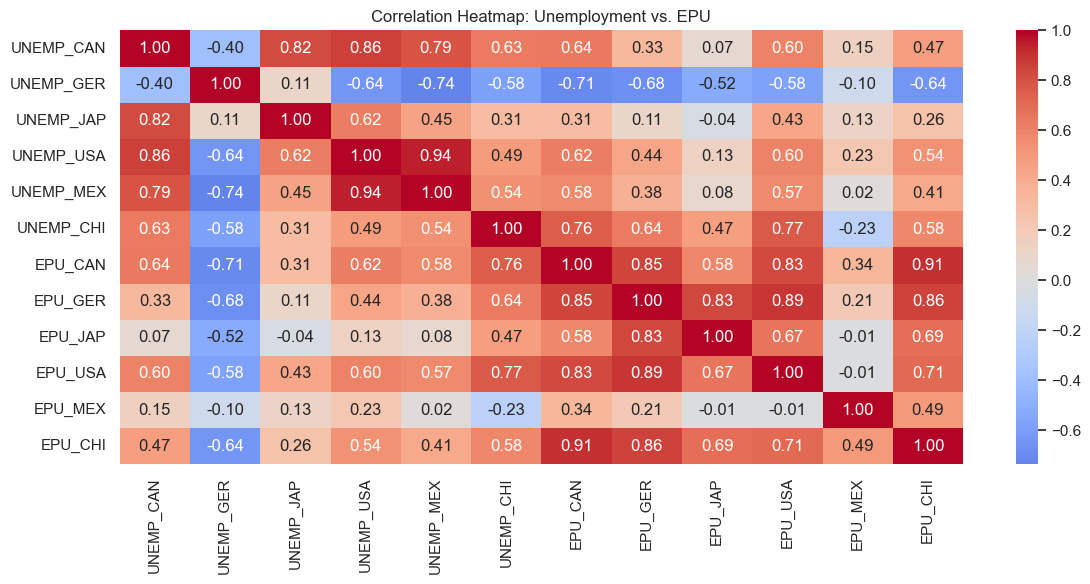

In [118]:
if 'corr_unemp' in locals():
    sns.heatmap(corr_unemp, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Unemployment vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [119]:
subset_recess = df[recess_cols + epu_cols].dropna()

if not subset_recess.empty:
    corr_recess = subset_recess.corr()
    print("Recession Indicator vs. EPU – Correlation Matrix:")
    display(corr_recess)
else:
    print("Not enough data for Recession vs. EPU correlation.")

Recession Indicator vs. EPU – Correlation Matrix:


,RECESS_CAN,RECESS_GER,RECESS_JAP,RECESS_USA,RECESS_MEX,RECESS_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
RECESS_CAN,1.000000,0.258356,0.374367,0.543162,0.165960,0.447010,0.330042,0.391045,0.340550,0.151672,-0.225763,0.614099
RECESS_GER,0.258356,1.000000,0.340151,0.435836,0.518448,0.719567,0.466328,0.312540,0.051536,0.249144,-0.266646,0.330282
RECESS_JAP,0.374367,0.340151,1.000000,0.302629,-0.047120,0.526651,0.567618,0.415435,0.170360,0.230680,-0.143148,0.540371
RECESS_USA,0.543162,0.435836,0.302629,1.000000,0.600722,0.628220,0.407037,0.435178,0.190323,0.288188,-0.328363,0.460603
RECESS_MEX,0.165960,0.518448,-0.047120,0.600722,1.000000,0.316487,0.398028,0.310243,0.157257,0.442865,-0.168928,0.186049
RECESS_CHI,0.447010,0.719567,0.526651,0.628220,0.316487,1.000000,0.502055,0.472929,0.105650,0.140119,-0.380518,0.557947
EPU_CAN,0.330042,0.466328,0.567618,0.407037,0.398028,0.502055,1.000000,0.804881,0.410902,0.645857,-0.069118,0.618049
EPU_GER,0.391045,0.312540,0.415435,0.435178,0.310243,0.472929,0.804881,1.000000,0.503313,0.634496,-0.136255,0.649217
EPU_JAP,0.340550,0.051536,0.170360,0.190323,0.157257,0.105650,0.410902,0.503313,1.000000,0.510499,-0.013465,0.320752
EPU_USA,0.151672,0.249144,0.230680,0.288188,0.442865,0.140119,0.645857,0.634496,0.510499,1.000000,-0.108459,0.309108


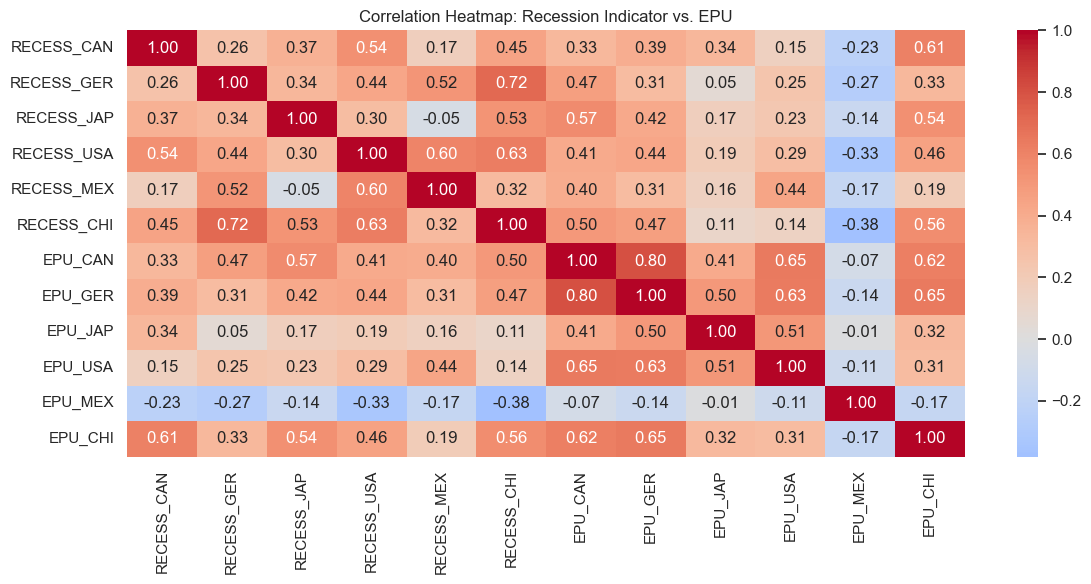

In [120]:
if 'corr_recess' in locals():
    sns.heatmap(corr_recess, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Recession Indicator vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [121]:
subset_cci = df[cci_cols + epu_cols].dropna()

if not subset_cci.empty:
    corr_cci = subset_cci.corr()
    print("Consumer Confidence Index vs. EPU – Correlation Matrix:")
    display(corr_cci)
else:
    print("Not enough data for CCI vs. EPU correlation.")

Consumer Confidence Index vs. EPU – Correlation Matrix:


,CCI_CAN,CCI_USA,CCI_CHI,CCI_GER,CCI_JAP,CCI_MEX,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
CCI_CAN,1.000000,0.645554,0.697715,0.102767,0.769486,0.749082,-0.694664,-0.566732,-0.536179,-0.575766,0.192113,-0.551989
CCI_USA,0.645554,1.000000,0.344626,0.227832,0.694056,0.521391,-0.402522,-0.324273,-0.529996,-0.701459,0.120071,-0.104591
CCI_CHI,0.697715,0.344626,1.000000,-0.197877,0.336341,0.620598,-0.557574,-0.486211,-0.397730,-0.367211,0.026857,-0.472022
CCI_GER,0.102767,0.227832,-0.197877,1.000000,0.171034,0.063924,0.196196,0.179434,0.008765,-0.138807,0.110455,0.236903
CCI_JAP,0.769486,0.694056,0.336341,0.171034,1.000000,0.691008,-0.528971,-0.401687,-0.512381,-0.565418,0.397811,-0.437700
CCI_MEX,0.749082,0.521391,0.620598,0.063924,0.691008,1.000000,-0.458331,-0.329825,-0.442710,-0.393570,0.408963,-0.239932
EPU_CAN,-0.694664,-0.402522,-0.557574,0.196196,-0.528971,-0.458331,1.000000,0.810979,0.420408,0.644243,-0.074093,0.614357
EPU_GER,-0.566732,-0.324273,-0.486211,0.179434,-0.401687,-0.329825,0.810979,1.000000,0.521111,0.632953,-0.143048,0.644866
EPU_JAP,-0.536179,-0.529996,-0.397730,0.008765,-0.512381,-0.442710,0.420408,0.521111,1.000000,0.519170,-0.017668,0.332691
EPU_USA,-0.575766,-0.701459,-0.367211,-0.138807,-0.565418,-0.393570,0.644243,0.632953,0.519170,1.000000,-0.112502,0.299726


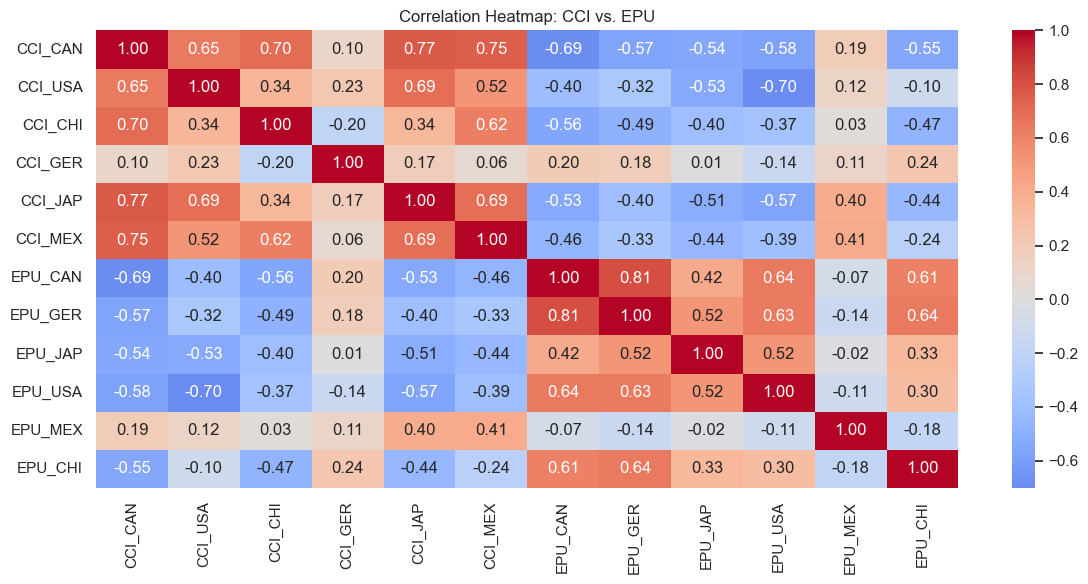

In [122]:
if 'corr_cci' in locals():
    sns.heatmap(corr_cci, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: CCI vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [123]:
gdpc_cols = [col for col in df.columns if col.startswith("GDPC_")]
subset_gdpc = df[gdpc_cols + epu_cols].dropna()

if not subset_gdpc.empty:
    corr_gdpc = subset_gdpc.corr()
    print("GDP per Capita vs. EPU – Correlation Matrix:")
    display(corr_gdpc)
else:
    print("Not enough data for GDPC vs. EPU correlation.")

GDP per Capita vs. EPU – Correlation Matrix:


,GDPC_CAN,GDPC_GER,GDPC_JAP,GDPC_USA,GDPC_MEX,GDPC_CHI,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
GDPC_CAN,1.000000,0.758884,0.831175,0.988095,0.792812,0.339557,-0.341465,0.074611,-0.174139,-0.128392,-0.107322,-0.163492
GDPC_GER,0.758884,1.000000,0.682749,0.734445,0.539874,0.788680,0.012860,0.460474,0.219780,0.266193,-0.049085,0.196205
GDPC_JAP,0.831175,0.682749,1.000000,0.827243,0.870217,0.150307,-0.586950,-0.095105,-0.094001,-0.338597,-0.184381,-0.463560
GDPC_USA,0.988095,0.734445,0.827243,1.000000,0.793121,0.299350,-0.297042,0.143497,-0.093564,-0.086842,-0.152896,-0.125604
GDPC_MEX,0.792812,0.539874,0.870217,0.793121,1.000000,-0.052851,-0.696853,-0.146641,-0.093482,-0.476141,-0.053535,-0.511033
GDPC_CHI,0.339557,0.788680,0.150307,0.299350,-0.052851,1.000000,0.453275,0.586000,0.238261,0.592429,0.014982,0.557299
EPU_CAN,-0.341465,0.012860,-0.586950,-0.297042,-0.696853,0.453275,1.000000,0.728017,0.499347,0.863316,0.096497,0.912405
EPU_GER,0.074611,0.460474,-0.095105,0.143497,-0.146641,0.586000,0.728017,1.000000,0.786403,0.881927,-0.192022,0.824636
EPU_JAP,-0.174139,0.219780,-0.094001,-0.093564,-0.093482,0.238261,0.499347,0.786403,1.000000,0.666746,-0.304923,0.572707
EPU_USA,-0.128392,0.266193,-0.338597,-0.086842,-0.476141,0.592429,0.863316,0.881927,0.666746,1.000000,-0.282927,0.835479


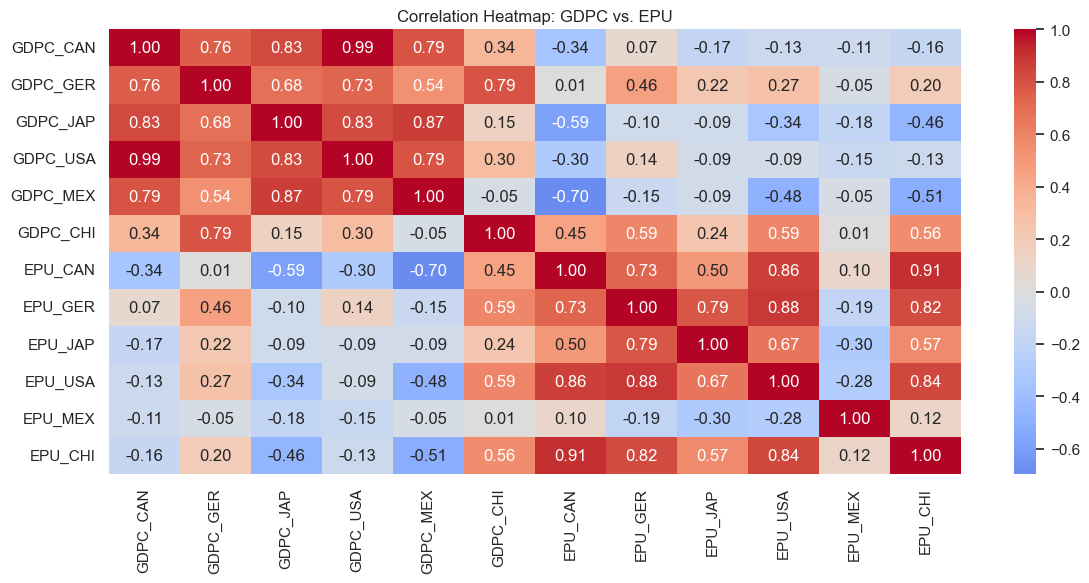

In [124]:
if 'corr_gdpc' in locals():
    sns.heatmap(corr_gdpc, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: GDPC vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [125]:
subset_ys = df[ys_cols + epu_cols].dropna()

if not subset_ys.empty:
    corr_ys = subset_ys.corr()
    print("Yield Spread vs. EPU – Correlation Matrix:")
    display(corr_ys)
else:
    print("Not enough data for Yield Spread vs. EPU correlation.")

Yield Spread vs. EPU – Correlation Matrix:


,YS_USA,YS_CAN,YS_MEX,YS_JAP,YS_CHI,YS_GER,EPU_CAN,EPU_GER,EPU_JAP,EPU_USA,EPU_MEX,EPU_CHI
YS_USA,1.000000,0.923329,0.606456,0.742398,0.389950,0.851230,-0.096027,0.204779,0.617439,0.479832,0.227468,-0.344955
YS_CAN,0.923329,1.000000,0.662921,0.734769,0.635120,0.902324,-0.170278,0.190762,0.721039,0.441126,0.415012,-0.330238
YS_MEX,0.606456,0.662921,1.000000,0.089924,0.386226,0.628030,0.176551,0.227246,0.183745,0.012391,0.534348,-0.138683
YS_JAP,0.742398,0.734769,0.089924,1.000000,0.497097,0.574748,-0.465427,0.000964,0.792159,0.606790,-0.019235,-0.340223
YS_CHI,0.389950,0.635120,0.386226,0.497097,1.000000,0.553630,-0.389577,0.077224,0.456864,-0.010621,0.480269,-0.358360
YS_GER,0.851230,0.902324,0.628030,0.574748,0.553630,1.000000,0.084368,0.343194,0.578579,0.385402,0.395524,-0.371284
EPU_CAN,-0.096027,-0.170278,0.176551,-0.465427,-0.389577,0.084368,1.000000,0.598760,-0.262081,0.185476,0.130060,0.422641
EPU_GER,0.204779,0.190762,0.227246,0.000964,0.077224,0.343194,0.598760,1.000000,0.113313,0.483056,-0.122406,0.219527
EPU_JAP,0.617439,0.721039,0.183745,0.792159,0.456864,0.578579,-0.262081,0.113313,1.000000,0.765201,0.230699,-0.393346
EPU_USA,0.479832,0.441126,0.012391,0.606790,-0.010621,0.385402,0.185476,0.483056,0.765201,1.000000,-0.090854,0.056740


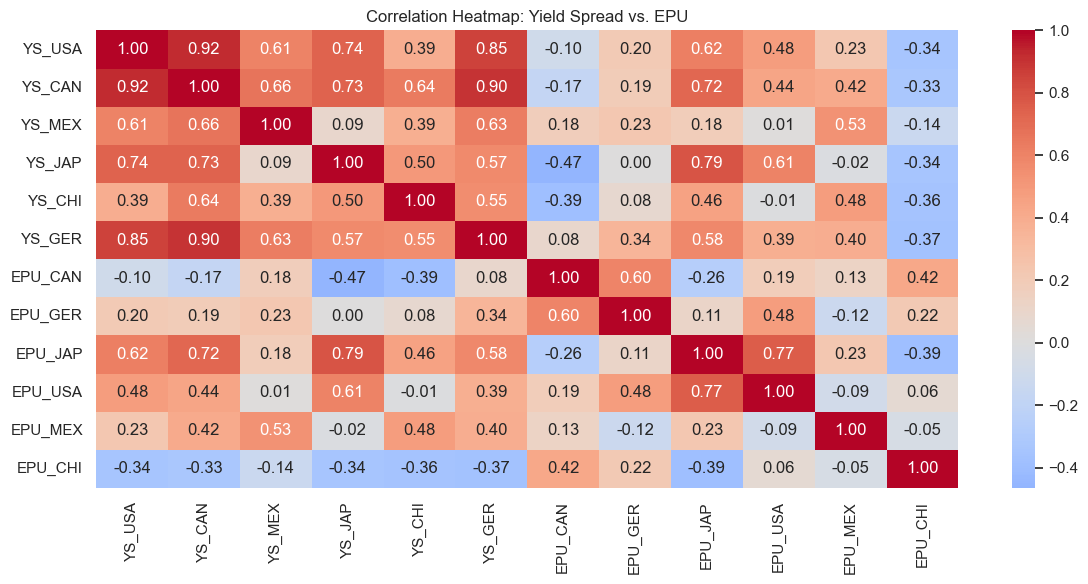

In [126]:
if 'corr_ys' in locals():
    sns.heatmap(corr_ys, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Yield Spread vs. EPU")
    plt.tight_layout()
    plt.show()
else:
    print("No correlation matrix available to plot.")

In [127]:
import re
country_suffixes = sorted(set(re.findall(r'_([A-Z]{3})$', ' '.join(df.columns))))
print(country_suffixes)

['GER']


In [128]:
# USA — Correlation Matrix
usa_cols = [col for col in df.columns if col.endswith("_USA")]
subset_usa = df[usa_cols].dropna()

if not subset_usa.empty:
    corr_usa = subset_usa.corr()
    print("Japan – Correlation Matrix:")
    display(corr_usa)
else:
    print("Not enough data for USA.")

Japan – Correlation Matrix:


,EPU_USA,IP_USA,YS_USA,INF_USA,UNEMP_USA,EX_USA,IM_USA,RECESS_USA,GDP_USA,GDPC_USA,CCI_USA
EPU_USA,1.000000,-0.239164,0.364064,0.042191,0.451716,0.164705,0.078205,0.266845,0.163604,0.107853,-0.711574
IP_USA,-0.239164,1.000000,-0.451595,0.205351,-0.624850,0.644426,0.732200,0.008170,0.656003,0.699338,0.391387
YS_USA,0.364064,-0.451595,1.000000,-0.217087,0.842304,-0.026702,-0.302821,0.187343,-0.278372,-0.376753,-0.569617
INF_USA,0.042191,0.205351,-0.217087,1.000000,-0.265775,0.009761,0.393892,-0.378384,0.302422,0.391454,-0.204255
UNEMP_USA,0.451716,-0.624850,0.842304,-0.265775,1.000000,-0.237945,-0.481176,-0.040920,-0.441587,-0.524639,-0.649540
EX_USA,0.164705,0.644426,-0.026702,0.009761,-0.237945,1.000000,0.872562,0.109787,0.882623,0.818722,0.088637
IM_USA,0.078205,0.732200,-0.302821,0.393892,-0.481176,0.872562,1.000000,-0.091975,0.980021,0.982243,0.101315
RECESS_USA,0.266845,0.008170,0.187343,-0.378384,-0.040920,0.109787,-0.091975,1.000000,-0.014453,-0.066424,-0.086041
GDP_USA,0.163604,0.656003,-0.278372,0.302422,-0.441587,0.882623,0.980021,-0.014453,1.000000,0.988485,0.077128
GDPC_USA,0.107853,0.699338,-0.376753,0.391454,-0.524639,0.818722,0.982243,-0.066424,0.988485,1.000000,0.112722


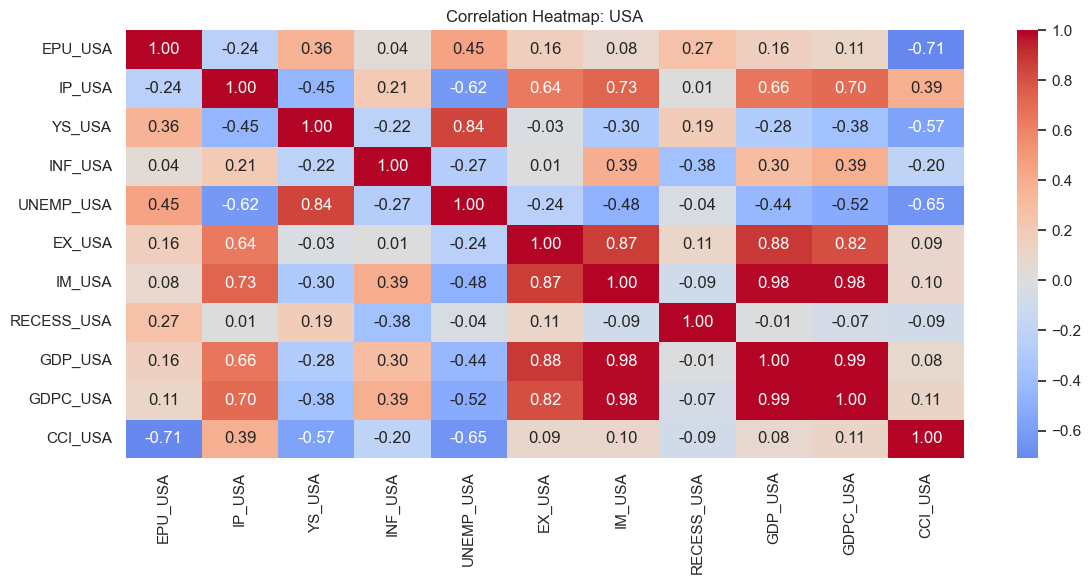

In [129]:
# USA — Heatmap
if 'corr_usa' in locals():
    sns.heatmap(corr_usa, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: USA")
    plt.tight_layout()
    plt.show()

In [130]:
# CANADA — Correlation Matrix
can_cols = [col for col in df.columns if col.endswith("_CAN")]
subset_can = df[can_cols].dropna()

if not subset_can.empty:
    corr_can = subset_can.corr()
    print("Canada – Correlation Matrix:")
    display(corr_can)
else:
    print("Not enough data for Canada.")

Canada – Correlation Matrix:


,EPU_CAN,IP_CAN,INF_CAN,EX_CAN,IM_CAN,RECESS_CAN,GDP_CAN,GDPC_CAN,EXR_CAN,CCI_CAN,UNEMP_CAN,YS_CAN
EPU_CAN,1.000000,-0.732211,-0.718853,-0.845577,-0.241911,0.686057,0.305040,-0.661830,-0.001876,-0.969076,0.783599,0.421422
IP_CAN,-0.732211,1.000000,0.436352,0.927692,-0.072032,-0.323057,-0.469085,0.511569,0.331786,0.699608,-0.858842,-0.752909
INF_CAN,-0.718853,0.436352,1.000000,0.580733,0.765011,-0.515453,0.315523,0.756801,-0.588594,0.761712,-0.556901,-0.161413
EX_CAN,-0.845577,0.927692,0.580733,1.000000,0.182540,-0.349026,-0.285101,0.755126,0.135683,0.859608,-0.973675,-0.809202
IM_CAN,-0.241911,-0.072032,0.765011,0.182540,1.000000,-0.097783,0.806960,0.730540,-0.917998,0.395243,-0.259677,-0.045530
RECESS_CAN,0.686057,-0.323057,-0.515453,-0.349026,-0.097783,1.000000,0.120230,-0.291929,-0.029008,-0.551533,0.170760,-0.013724
GDP_CAN,0.305040,-0.469085,0.315523,-0.285101,0.806960,0.120230,1.000000,0.380343,-0.835444,-0.164163,0.219759,0.124125
GDPC_CAN,-0.661830,0.511569,0.756801,0.755126,0.730540,-0.291929,0.380343,1.000000,-0.454688,0.779226,-0.788463,-0.655983
EXR_CAN,-0.001876,0.331786,-0.588594,0.135683,-0.917998,-0.029008,-0.835444,-0.454688,1.000000,-0.164618,-0.043081,-0.248890
CCI_CAN,-0.969076,0.699608,0.761712,0.859608,0.395243,-0.551533,-0.164163,0.779226,-0.164618,1.000000,-0.844646,-0.482332


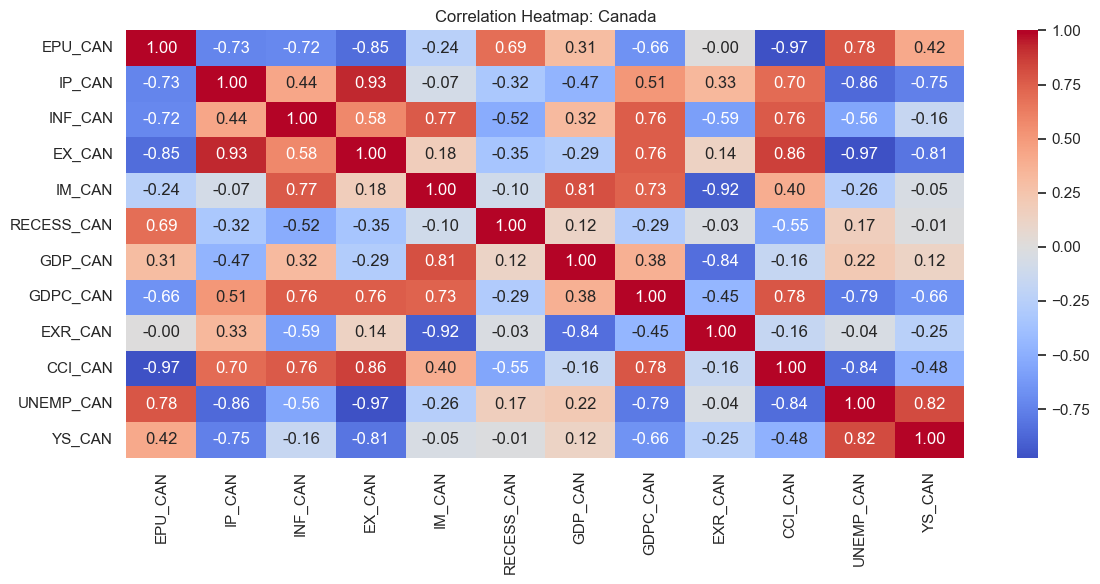

In [131]:
# CANADA — Heatmap
if 'corr_can' in locals():
    sns.heatmap(corr_can, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Canada")
    plt.tight_layout()
    plt.show()

In [132]:
# Mexico — Correlation Matrix
mex_cols = [col for col in df.columns if col.endswith("_MEX")]
subset_mex = df[mex_cols].dropna()

if not subset_mex.empty:
    corr_mex = subset_mex.corr()
    print("Mexico – Correlation Matrix:")
    display(corr_mex)
else:
    print("Not enough data for Mexico.")

Mexico – Correlation Matrix:


,EPU_MEX,IP_MEX,INF_MEX,GDP_MEX,EXR_MEX,UNEMP_MEX,GDPC_MEX,IM_MEX,EX_MEX,RECESS_MEX,CCI_MEX,YS_MEX
EPU_MEX,1.000000,-0.037337,-0.709530,-0.136948,-0.545291,-0.792569,0.184866,-0.256090,-0.003632,0.289302,0.605546,0.023968
IP_MEX,-0.037337,1.000000,0.246784,0.986962,0.537729,-0.190134,0.971087,0.959705,0.985377,-0.490985,0.456215,-0.861082
INF_MEX,-0.709530,0.246784,1.000000,0.364737,0.417762,0.334839,0.055091,0.499591,0.232161,0.156257,-0.712728,-0.432449
GDP_MEX,-0.136948,0.986962,0.364737,1.000000,0.586533,-0.103971,0.939154,0.979813,0.961120,-0.442250,0.330621,-0.900837
EXR_MEX,-0.545291,0.537729,0.417762,0.586533,1.000000,0.265093,0.412331,0.628407,0.535125,-0.640835,0.006437,-0.320418
UNEMP_MEX,-0.792569,-0.190134,0.334839,-0.103971,0.265093,1.000000,-0.314724,-0.081105,-0.301670,-0.351225,-0.557376,0.237095
GDPC_MEX,0.184866,0.971087,0.055091,0.939154,0.412331,-0.314724,1.000000,0.872122,0.951255,-0.449144,0.587922,-0.832907
IM_MEX,-0.256090,0.959705,0.499591,0.979813,0.628407,-0.081105,0.872122,1.000000,0.951506,-0.411232,0.222276,-0.878846
EX_MEX,-0.003632,0.985377,0.232161,0.961120,0.535125,-0.301670,0.951255,0.951506,1.000000,-0.453340,0.501644,-0.841910
RECESS_MEX,0.289302,-0.490985,0.156257,-0.442250,-0.640835,-0.351225,-0.449144,-0.411232,-0.453340,1.000000,-0.426297,0.028885


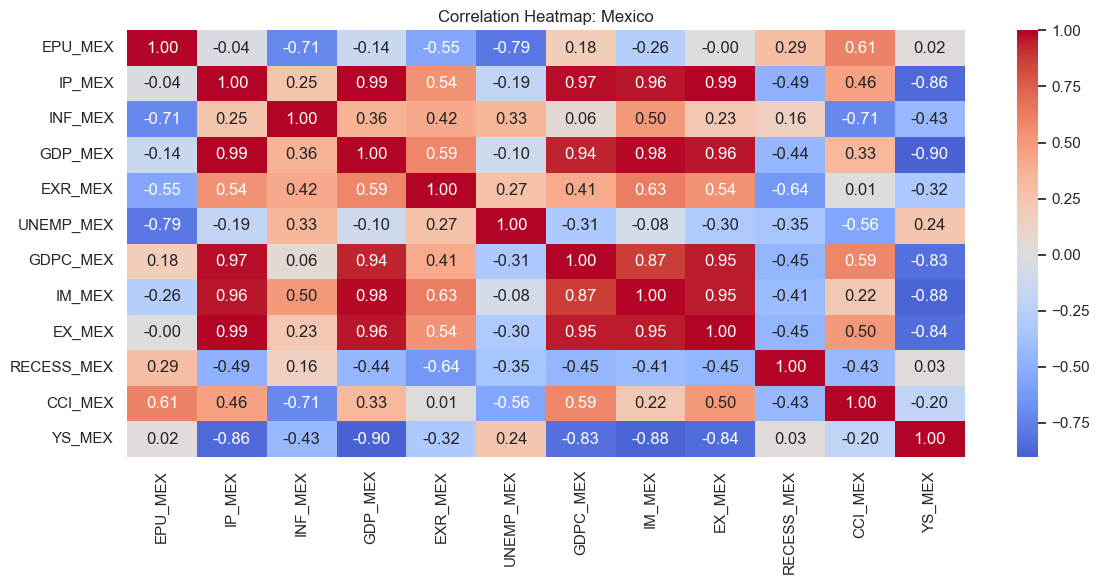

In [133]:
# Mexico — Heatmap
if 'corr_mex' in locals():
    sns.heatmap(corr_mex, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Mexico")
    plt.tight_layout()
    plt.show()

In [134]:
# Germany — Correlation Matrix
ger_cols = [col for col in df.columns if col.endswith("_GER")]
subset_ger = df[ger_cols].dropna()

if not subset_ger.empty:
    corr_ger = subset_ger.corr()
    print("Germany – Correlation Matrix:")
    display(corr_ger)
else:
    print("Not enough data for Germany.")

Germany – Correlation Matrix:


,EPU_GER,IP_GER,INF_GER,UNEMP_GER,IM_GER,EX_GER,RECESS_GER,GDP_GER,GDPC_GER,EXR_GER,CCI_GER,YS_GER
EPU_GER,1.000000,0.021790,-0.037873,-0.719007,0.602595,0.517865,-0.071066,0.501729,0.487193,-0.835995,-0.019102,0.241768
IP_GER,0.021790,1.000000,0.927277,-0.211481,0.669023,0.816691,-0.853081,0.838496,0.755873,-0.371352,0.876012,-0.419526
INF_GER,-0.037873,0.927277,1.000000,-0.014846,0.436307,0.655912,-0.635199,0.708334,0.529563,-0.304799,0.728627,-0.580367
UNEMP_GER,-0.719007,-0.211481,-0.014846,1.000000,-0.808583,-0.718824,0.241376,-0.682980,-0.770551,0.783765,-0.344830,-0.596975
IM_GER,0.602595,0.669023,0.436307,-0.808583,1.000000,0.958941,-0.704965,0.934675,0.975728,-0.776890,0.696882,0.134715
EX_GER,0.517865,0.816691,0.655912,-0.718824,0.958941,1.000000,-0.747312,0.995360,0.976146,-0.761893,0.782707,-0.005953
RECESS_GER,-0.071066,-0.853081,-0.635199,0.241376,-0.704965,-0.747312,1.000000,-0.721709,-0.781175,0.266567,-0.791968,0.235223
GDP_GER,0.501729,0.838496,0.708334,-0.682980,0.934675,0.995360,-0.721709,1.000000,0.951835,-0.760739,0.789663,-0.061687
GDPC_GER,0.487193,0.755873,0.529563,-0.770551,0.975728,0.976146,-0.781175,0.951835,1.000000,-0.716886,0.764991,0.124978
EXR_GER,-0.835995,-0.371352,-0.304799,0.783765,-0.776890,-0.761893,0.266567,-0.760739,-0.716886,1.000000,-0.210735,-0.032575


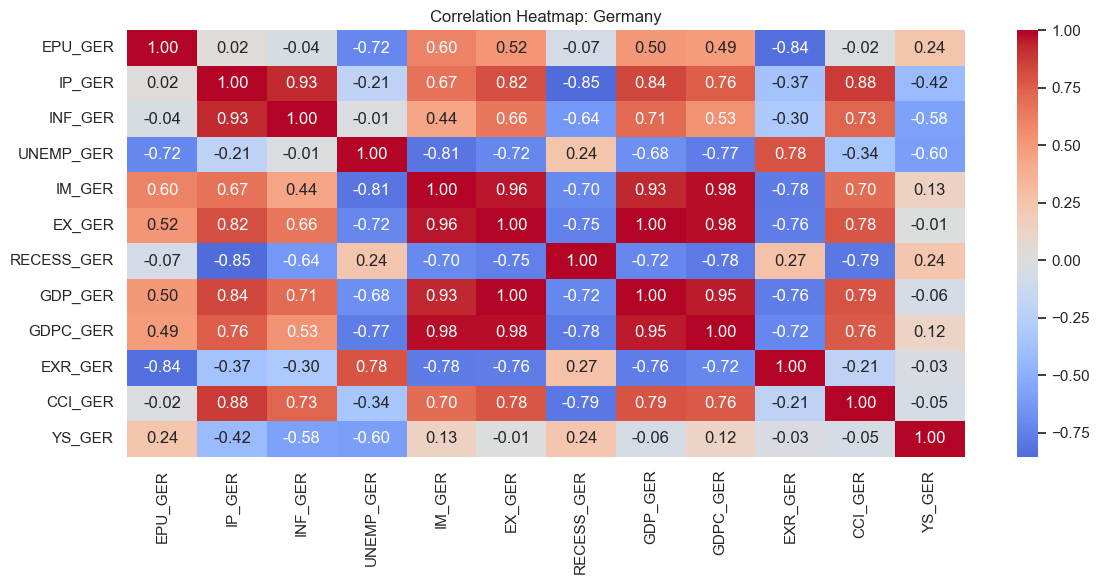

In [135]:
# CANADA — Heatmap
if 'corr_ger' in locals():
    sns.heatmap(corr_ger, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Germany")
    plt.tight_layout()
    plt.show()

In [140]:
# CHINA — Correlation Matrix
chi_cols = [col for col in df.columns if col.endswith("_CHI")]
subset_chi = df[chi_cols]

if not subset_chi.empty:
    corr_chi = subset_chi.corr()
    print("China – Correlation Matrix:")
    display(corr_chi)
else:
    print("Not enough data for China.")

China – Correlation Matrix:


,EPU_CHI,IP_CHI,INF_CHI,IM_CHI,EX_CHI,TB_CHI,RECESS_CHI,EXR_CHI,UNEMP_CHI,GDPC_CHI,GDP_CHI,CCI_CHI,YS_CHI
EPU_CHI,1.000000,-0.590257,-0.142876,0.589733,0.584341,-0.187782,0.471157,-0.277536,0.136779,0.613884,0.653005,0.392190,-0.341883
IP_CHI,-0.590257,1.000000,0.143323,-0.433057,-0.431609,0.174514,-0.539504,0.458304,-0.080033,-0.536421,-0.543181,0.011070,0.373915
INF_CHI,-0.142876,0.143323,1.000000,-0.157971,-0.122685,-0.091120,-0.377057,0.152777,-0.230003,-0.321743,-0.333079,0.120247,NaN
IM_CHI,0.589733,-0.433057,-0.157971,1.000000,0.993434,-0.349737,0.419096,-0.799966,0.288506,0.993768,0.989065,0.260829,NaN
EX_CHI,0.584341,-0.431609,-0.122685,0.993434,1.000000,-0.296492,0.396463,-0.802781,0.340828,0.981791,0.979756,0.261634,NaN
TB_CHI,-0.187782,0.174514,-0.091120,-0.349737,-0.296492,1.000000,-0.139807,0.315376,-0.066531,-0.242483,-0.213047,-0.091049,-0.056425
RECESS_CHI,0.471157,-0.539504,-0.377057,0.419096,0.396463,-0.139807,1.000000,-0.459532,0.212973,0.492804,0.477982,0.019903,-0.528404
EXR_CHI,-0.277536,0.458304,0.152777,-0.799966,-0.802781,0.315376,-0.459532,1.000000,-0.408150,-0.683977,-0.638541,0.086063,0.300308
UNEMP_CHI,0.136779,-0.080033,-0.230003,0.288506,0.340828,-0.066531,0.212973,-0.408150,1.000000,0.455479,0.471169,0.042781,NaN
GDPC_CHI,0.613884,-0.536421,-0.321743,0.993768,0.981791,-0.242483,0.492804,-0.683977,0.455479,1.000000,0.994375,0.290726,NaN


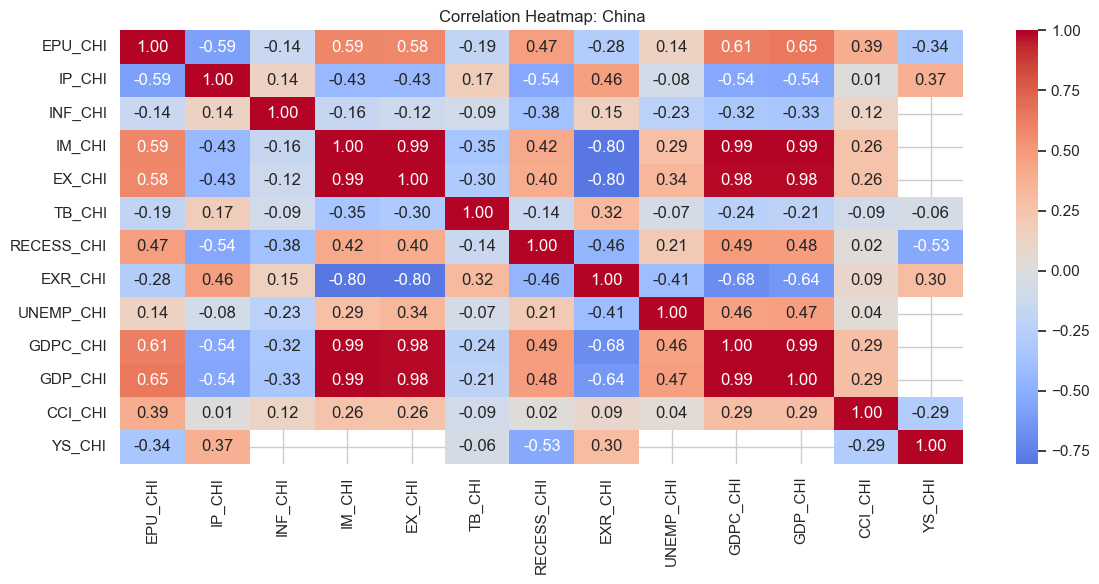

In [141]:
# CHINA — Heatmap
if 'corr_chi' in locals():
    sns.heatmap(corr_chi, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: China")
    plt.tight_layout()
    plt.show()

In [138]:
# JAPAN — Correlation Matrix
jap_cols = [col for col in df.columns if col.endswith("_JAP")]
subset_jap = df[jap_cols].dropna()

if not subset_jap.empty:
    corr_jap = subset_jap.corr()
    print("Japan – Correlation Matrix:")
    display(corr_jap)
else:
    print("Not enough data for Japan.")

Japan – Correlation Matrix:


,EPU_JAP,IP_JAP,INF_JAP,UNEMP_JAP,EX_JAP,RECESS_JAP,GDP_JAP,GDPC_JAP,IM_JAP,EXR_JAP,CCI_JAP,YS_JAP
EPU_JAP,1.000000,-0.173827,0.382634,-0.144870,0.159291,0.314496,-0.225597,-0.094001,0.067504,-0.051393,-0.606955,-0.472994
IP_JAP,-0.173827,1.000000,0.756024,-0.824488,0.282127,-0.807287,0.783242,0.731593,0.575825,0.789212,0.829525,0.226055
INF_JAP,0.382634,0.756024,1.000000,-0.800811,0.280899,-0.484680,0.544356,0.545875,0.596416,0.530015,0.408709,0.049002
UNEMP_JAP,-0.144870,-0.824488,-0.800811,1.000000,-0.073134,0.472599,-0.520382,-0.498353,-0.460884,-0.704779,-0.633380,-0.223361
EX_JAP,0.159291,0.282127,0.280899,-0.073134,1.000000,-0.260238,0.671599,0.798528,0.705517,-0.080372,0.056721,-0.492895
RECESS_JAP,0.314496,-0.807287,-0.484680,0.472599,-0.260238,1.000000,-0.589185,-0.554462,-0.278381,-0.646327,-0.642563,-0.305682
GDP_JAP,-0.225597,0.783242,0.544356,-0.520382,0.671599,-0.589185,1.000000,0.975725,0.902256,0.401495,0.659314,-0.197556
GDPC_JAP,-0.094001,0.731593,0.545875,-0.498353,0.798528,-0.554462,0.975725,1.000000,0.903678,0.346260,0.547973,-0.269165
IM_JAP,0.067504,0.575825,0.596416,-0.460884,0.705517,-0.278381,0.902256,0.903678,1.000000,0.174043,0.394180,-0.424387
EXR_JAP,-0.051393,0.789212,0.530015,-0.704779,-0.080372,-0.646327,0.401495,0.346260,0.174043,1.000000,0.570650,0.182359


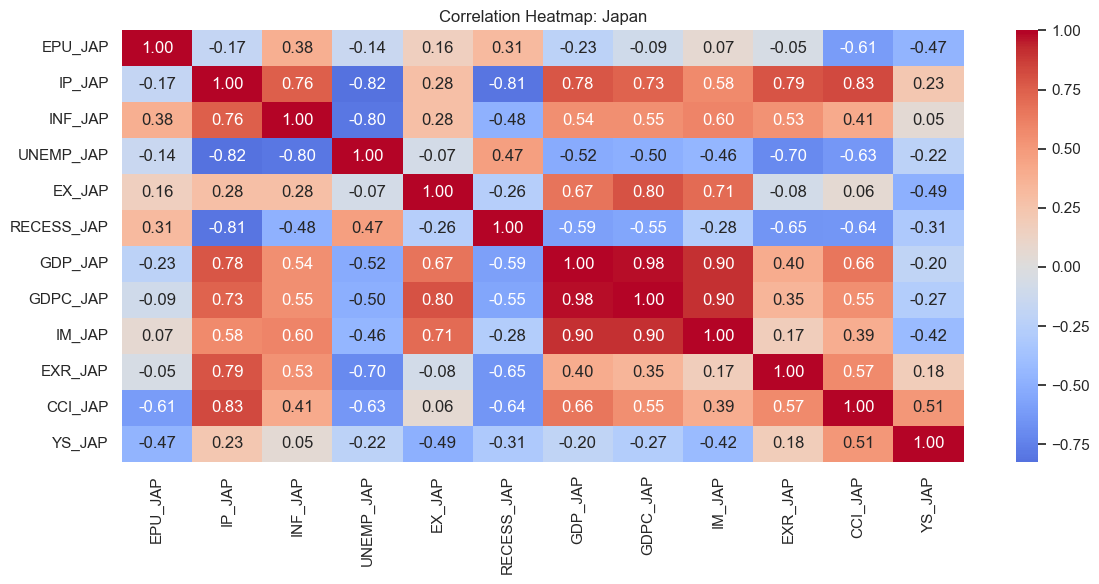

In [139]:
# JAPAN — Heatmap
if 'corr_jap' in locals():
    sns.heatmap(corr_jap, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap: Japan")
    plt.tight_layout()
    plt.show()